# Schrödinger's Equation

One of the most important governing equations in all of physics. If you do anything to do with quantum mechanics, chances are you'll be dealing with Schrödinger's Equation in one form or another.

The Time Dependent Schrödinger Equation (TDSE) in one (spatial) dimension is written:

$$ i \hbar \frac{\partial}{\partial t} \Psi (x, t) = \hat{\mathbf{H}} \Psi (x,t) $$

where $\hat{\mathbf{H}}$ is the hamiltonian defined as $\hat{\mathbf{H}} = - \frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x,t) $ and $\Psi(x,t)$ is the wave function.

In general, this is not an easy partial differential equation (PDE) to solve. Fortunately, with a few mild assumptions, we can simplify the equation to the Time Independent Schrödinger Equation (TISE):

First we assume our potential energy function is independent of time $V(x,t) = V(x)$. Then look for solutions of the form $\Psi(x,t) = \psi(x) \phi(t)$ for some $\psi(x)$ and $\phi(t)$.

$$ \hat{\mathbf{H}} \psi(x) = E \psi(x) $$


### Problem 1: Solving half of the problem for good

Given only the assumptions and notation above, solve the TDSE for $\phi(t)$ for all possible $V(x)$.

Hint: plug in $\Psi(x,t)=\psi(x)\phi(t)$ to the TDSE, apply the TISE, and solve the resulting first order ordinary differential equation.

$$ i \hbar \frac{\partial}{\partial t} \Psi (x, t) = [- \frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x)] \Psi (x,t) $$
$$ i \hbar \frac{\partial}{\partial t} \psi(x) \phi(t) = [- \frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x)] \psi(x) \phi(t) $$
$$ \frac{i \hbar}{\phi(t)} \frac{\partial}{\partial t} \phi(t) = \frac{1}{\psi(x)}[- \frac{\hbar^2}{2m} \frac{\partial^2}{\partial x^2} + V(x)] \psi(x) = E $$
solve the $\phi(t)$ with constant E:
$$ i \hbar \frac{\partial}{\partial t} \phi(t) = E \phi(t) $$
$$ \phi(t) = A e ^ {- \frac{i E}{\hbar} t} $$

## Solving Schrödinger's Equation Numerically

The TISE is nothing more than an eigenvalue equation, so if we can write our hamiltonian as a matrix, then all we have to is solve for the eigenvalues and eigenvectors/eigenfunctions and we'll have $\psi(x)$, and since you already found $\phi(t)$, then we'll know everything we could possibly want to about our system!

If you hear "numerically" in the context of python, you know what's coming... some `numpy` magic.

In [1]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

There are two especially useful `numpy` functions we'll need here:`linalg.eig` and `eye`.

In [2]:
np.eye?

In [3]:
np.linalg.eig?

The trick to representing our hamiltonian as a matrix is discretization. See details in the lecture notes, but the notation below should be very similar.

We'll be simulating a toy system with arbitrary units

In [4]:
N = 100 # some constant grid point 
L = 100 # 8 * 10**-9

def V(x): # Return the potential energy given the position of each grid element
    # if 0 < x < L
    # 0.4         ### 0.4 * q = 400 meV
    # else
    # 0
    return 0 * x # In this case, we are setting the potential energy to zero.

eta = 1 # hbar
m = 1 # mass of electron
q = 1 # electron charge

In [5]:
X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2) # 1-108
eps = -2*t + q * V(X)        # 1-109

In [6]:
H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian

If you're ever curious about what your matrix actually looks like, you can plot it using `matshow`. And mouse over elements to see their values. Note that our hamitonian has offdiagonal elements, where do they come from and why do we need those?

diagonal is eps, offdiagonal is t. They come from: 
$$ t \psi (i-1) + \epsilon (i) \psi (i) + t \psi (i+1) = E \psi (i) $$

<IPython.core.display.Javascript object>


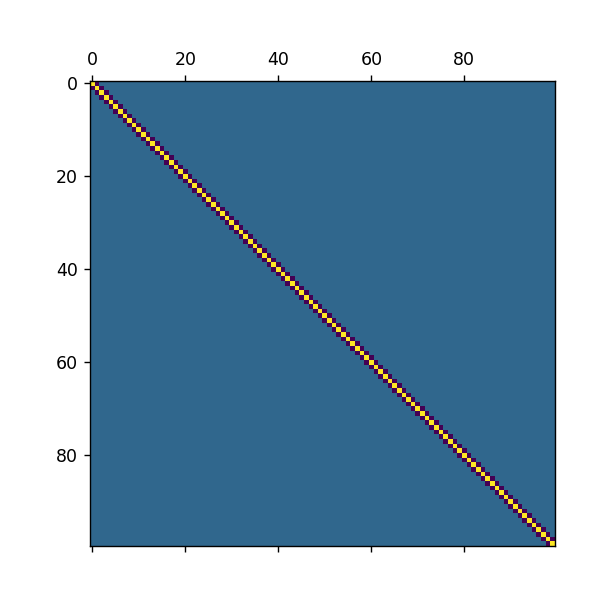

In [8]:
plt.matshow(H)

Now let's actually solve the TISE for the energies and wavefunctions using `linalg.eig`.

That brings up an interesting question: We only have one equation, but we are solving this one equation for two unknowns (the wavefunction, and the energy), thinking back to linear algebra, shouldn't this problem be underdetermined? That is to say, how is it that we can use a single equation to solve for both the wavefunction and energy?

It's an eigen value problem. 

In [8]:
vals, vecs = np.linalg.eig(H)

Unfortunately `linalg.eig` does not return the eigenvalues/vectors sorted, but that can be fixed with a little `numpy` magic. Make sure you understand how to two lines below work - tricks like these can dramatically speed up your work.
Also, since our `vecs` variable holds column vectors we can flip those to row vectors in the last line. We also have to normalize our wavefunctions (given the grid spacing that we were using).

In [9]:
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
vecs /= np.sqrt(a)

Now we have the eigenvalues (which correspond to the energies of each state) and the eigenvectors (which are the states, aka wavefunctions).

Before plotting the energy spectrum below, what do you expect the energies will look like, given that our potential energy  is zero accross the entire wire (V=0)?

Almost like a straight line. 

<IPython.core.display.Javascript object>


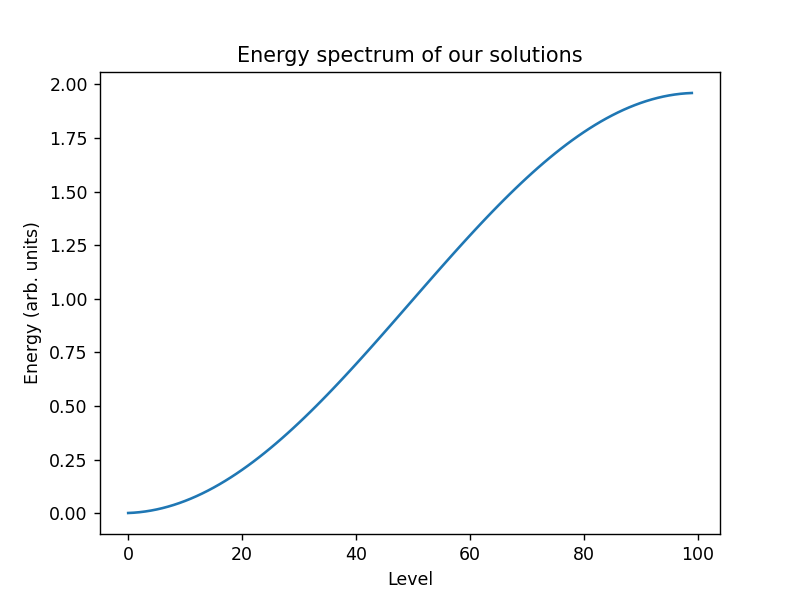

Text(0, 0.5, 'Energy (arb. units)')

In [10]:
plt.figure()
plt.plot(vals)
plt.title('Energy spectrum of our solutions')
plt.xlabel('Level')
plt.ylabel('Energy (arb. units)')

Does this spectrum look as expected? If not, why not?

NO, the energy change more nonlinerly for 0-20 and 80-100 level. 

Finally we can plot the first few wavefunctions and corresponding energies we found. But you already know what to expect, right?

<IPython.core.display.Javascript object>


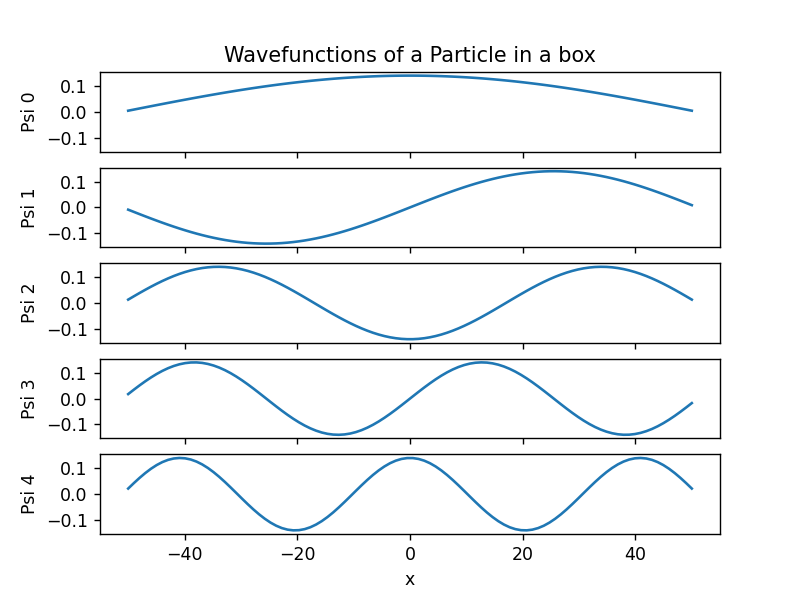

E_0 = 0.0005
E_1 = 0.0019
E_2 = 0.0043
E_3 = 0.0076
E_4 = 0.0118


Text(0.5, 0, 'x')

In [11]:
fig, axes = plt.subplots(5, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Wavefunctions of a Particle in a box')
for i, (ax, psi, E) in enumerate(zip(axes, vecs, vals)):
    plt.sca(ax)
    plt.ylabel('Psi {}'.format(i))
    plt.plot(X, psi)
    #plt.fill_between(X, psi, alpha=0.3)
    print('E_{} = {:.4f}'.format(i, E))
plt.xlabel('x')

While this is theoretically all fine and good, being learned in the ways of quantum mechanics we know that the wavefunction is not directly measurable. Instead, if we measure for example the position of our particle, the actual outcome of our measurement will be one of the eigenvalues of the position operator. Fortunately, we have been working in the position basis (solving for our wavefunction as a function of $x$), so we can get the probability distribution over possible measurement outcomes directly from our wavefunction:

$$ p(x) = |\psi(x)|^2 $$

where $p(x)$ is the probability density function of outcomes from position measurements.

In [12]:
p = np.abs(vecs)**2

To compute the probability form our probability density function, all we need is to multiply by $dx$, in our case we have already discretized our wire so $dx = a$.

$$ \mathrm{Prob}(x) = p(x) dx $$

In [13]:
probs = a*p

In [14]:
fig, axes = plt.subplots(5, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Position distributions of a Particle in a box')
for i, (ax, pd) in enumerate(zip(axes, p)):
    plt.sca(ax)
    plt.ylabel('p_{}(x)'.format(i))
    plt.plot(X, pd)
    plt.fill_between(X, pd, alpha=0.3)
plt.xlabel('x')

<IPython.core.display.Javascript object>

Text(0.5, 0, 'x')

### Problem 2: Quantum Harmonic Oscillator

Above is the code to compute and plot the 5 lowest energy states of a particle confined to a box from `-L/2` to `L/2`.
Now do the same for a particle in a hamonic potential using the parameters given below. Please do not modify the code above, instead copy and paste anything you need below this cell.

Remember, the potential energy of a harmonic oscillators takes the form $V(x) = kx^2$ where $k$ is the spring constant.
In our case, let (using arbitrary units):
$$ k = 0.01 $$
$$ \eta = 1 $$
$$ L = 100 $$
$$ m = 1 $$
$$ q = 1 $$

When plotting the energy spectrum of the solutions, once again predict what shape the spectrum should take, and then after plotting explain any differences to your prediction.

Deliverables:
- Plot of the energy spectrum (energy vs level)
- Plot of the wavefunctions of the lowest 5 energy levels
- Plot of the probability density functions of outcomes of position measurements for the lowest 5 energy levels

In [15]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt

In [16]:
k = 0.01
L = 100
N = 100

def V(x): return k * x**2

eta = 1 
m = 1
q = 1

X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2)
eps = -2*t + q * V(X)

H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian


Hamitonian showing below

<IPython.core.display.Javascript object>


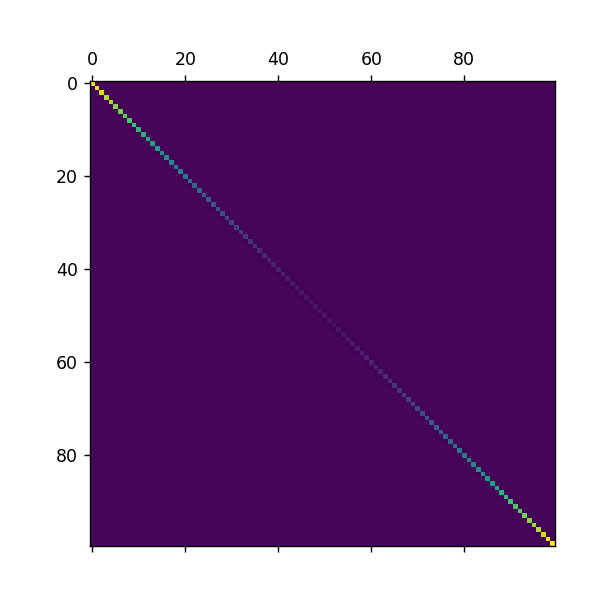

In [17]:
plt.matshow(H)

In [18]:
vals, vecs = np.linalg.eig(H)

In [19]:
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
vecs /= np.sqrt(a)

It would looks like a parabola. 

<IPython.core.display.Javascript object>


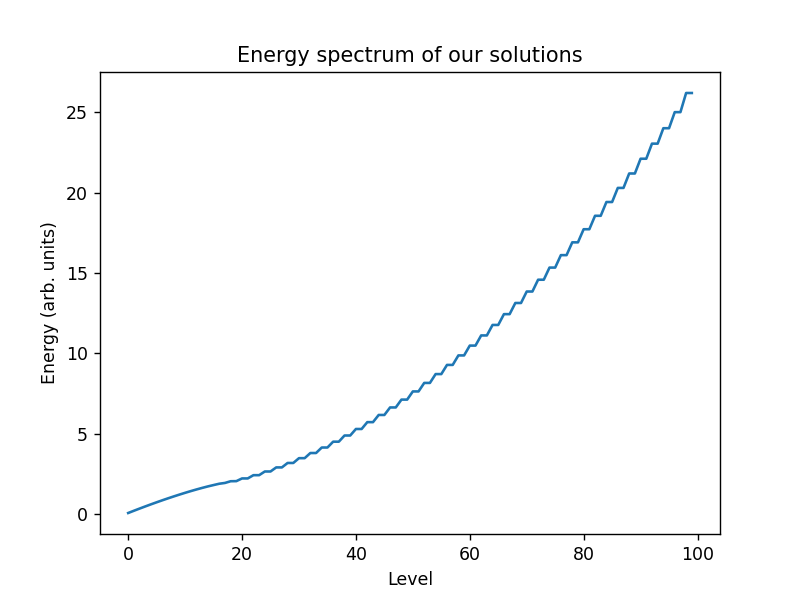

Text(0, 0.5, 'Energy (arb. units)')

In [20]:
plt.figure()
plt.plot(vals)
plt.title('Energy spectrum of our solutions')
plt.xlabel('Level')
plt.ylabel('Energy (arb. units)')

Not exactly. Too little data points.

<IPython.core.display.Javascript object>


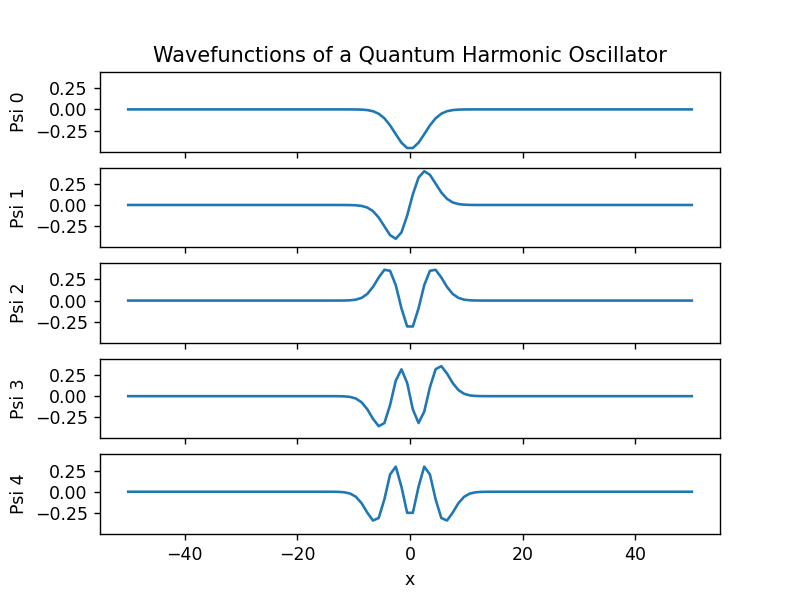

E_0 = 0.0701
E_1 = 0.2089
E_2 = 0.3450
E_3 = 0.4785
E_4 = 0.6090


Text(0.5, 0, 'x')

In [21]:
fig, axes = plt.subplots(5, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Wavefunctions of a Quantum Harmonic Oscillator')
for i, (ax, psi, E) in enumerate(zip(axes, vecs, vals)):
    plt.sca(ax)
    plt.ylabel('Psi {}'.format(i))
    plt.plot(X, psi)
    #plt.fill_between(X, psi, alpha=0.3)
    print('E_{} = {:.4f}'.format(i, E))
plt.xlabel('x')

In [22]:
p = np.abs(vecs)**2

probs = a*p

<IPython.core.display.Javascript object>


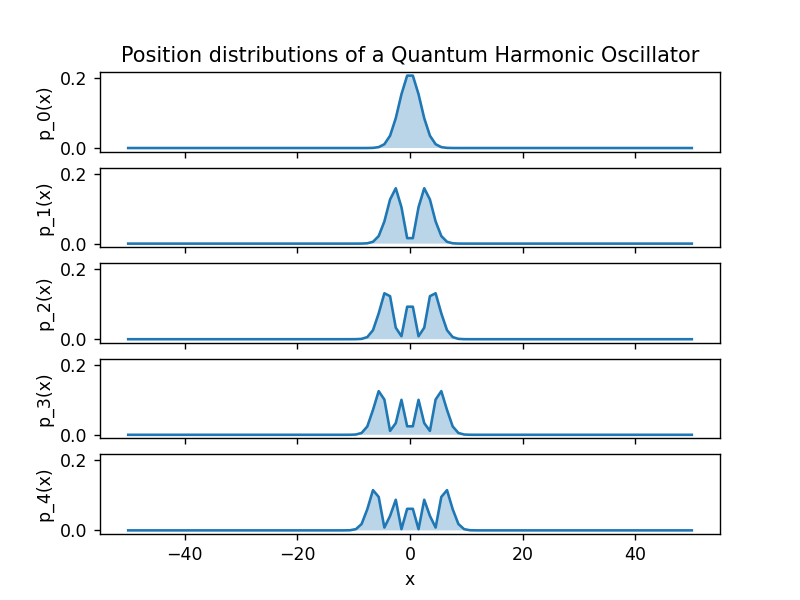

Text(0.5, 0, 'x')

In [23]:
fig, axes = plt.subplots(5, sharex=True, sharey=True)
plt.sca(axes[0])
plt.title('Position distributions of a Quantum Harmonic Oscillator')
for i, (ax, pd) in enumerate(zip(axes, p)):
    plt.sca(ax)
    plt.ylabel('p_{}(x)'.format(i))
    plt.plot(X, pd)
    plt.fill_between(X, pd, alpha=0.3)
plt.xlabel('x')

### Problem 3: Harmonic Oscillator Frequencies

Once you have the energies of the wavefunctions for the quantum harmonic oscillator, let's make sure they look right.
We know the energy levels of the quantum harmonic oscillator states takes the form (see lecture notes for details):

$$ E_n = \eta \omega (n + \frac{1}{2}) $$

where $n$ is the energy level, $\eta$ is our natural constant ($\eta = \hbar$ in reality), and $\omega$ is the frequency of our oscillator.

You will note the ground state ($n=0$) still has some energy ($E_0=\frac{\eta \omega}{2}$), this is called the zero point energy, and it carries some deep significance in physics. (Among other things, the zero point energy is related to virtual photons predicted by Quantum Field Theory, and possibly even the dark energy in the universe...)

Anyway, use the computed energy values for the lowest 5 energy levels to estimate the frequency of our harmonic oscillator. Then use a smaller grid spacing (increase $N$) to make sure your estimate of the frequency has converged. (extra credit if you quantitatively estimate the uncertainty)

In [24]:
k = 0.01
L = 100
N = 100

def V(x): return k * x**2

eta = 1 
m = 1
q = 1

X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2)
eps = -2*t + q * V(X)

H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian


In [25]:
vals, vecs = np.linalg.eig(H)

In [26]:
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
vecs /= np.sqrt(a)

In [27]:
freq = [0] * 5
for n in range(5):
  freq[n] = vals[n] / eta / (n+1/2)
print(freq)
sum(freq) / len(freq)

[0.14013415017513856, 0.1392595542547931, 0.13801917755239715, 0.13670254141635066, 0.13533971795364938]


0.1378910282704658

In crease N to make frequency converge

In [28]:
k = 0.01
L = 100
N = 1000

def V(x): return k * x**2

eta = 1 
m = 1
q = 1

X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2)
eps = -2*t + q * V(X)

H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1) # discretized hamiltonian


In [29]:
vals, vecs = np.linalg.eig(H)

In [30]:
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
vecs /= np.sqrt(a)

In [31]:
freq = [0] * 5
for n in range(5):
  freq[n] = vals[n] / eta / (n+1/2)
print(freq)
sum(freq) / len(freq)

[0.14140883009006255, 0.14140047784559354, 0.14138878336992283, 0.14137660952769365, 0.1413642744137693]


0.14138779504940838



## Phase Shifts

It may seem strange for our wavefunction to be complex valued. The fact of the matter is we trust Schrödinger's equation more than we trust our interpretation of the wavefunction. Mathematically, complex eigenfunctions of the hamiltonian exist, so our interpretation better have an explanation to make sense of this mathematical quirk.

The, rather elegant, solution is to recognize that eventhough the wavefunction may be complex, the outcomes of measurements are actually the corresponding eigenvalues, so as long as the eigenvalues are always real, it doesn't matter if eigenfunctions have an imaginary component.

Another quirk of the Schrödinger equation is that given any solution $\Psi(x,t)$, any arbitrary phase shift of $\Psi(x,t)$ will still be a solution.

### Problem 4: Phase of the Wavefunction

Show that if $\Psi(x,t)$ is a solution to the TDSE, then $e^{i\alpha} \Psi(x,t)$ (for some fixed $\alpha$) is also a solution. (Hint: this is a one liner)

$$ e^{i\alpha} \Psi(x,t) = e^{\alpha} e^{i} \Psi(x,t) = A \Psi(x,t)$$
Where is A constant

## Time Evolution

After turning the TDSE into the TISE using separation of variables, we focused on finding solutions for the TISE, but now that we have solutions for the TISE, we can go back and look at how our system evolves over time.

Once we have found a solution $\psi(x)$ and the corresponding energy $E$ using the TISE, we can combine it with the time component $\phi(t)$

$$ \hat{\mathbf{H}} \psi(x) = E \psi(x) $$

$$ \phi(t) = e^{-i\frac{E}{\hbar}t} $$

Now the overall solution to the TDSE is $\Psi(x,t) = \psi(x) \phi(t)$.

Let's take a look at how solutions to the particle in the box evolve over time using matplotlib animations.

In [32]:
import matplotlib.animation as animation

First we solve the TISE for the particle in the box, once again, to get the energies and eigenstates.

In [33]:
N = 100
L = 100

def V(x): # Return the potential energy given the position of each grid element
    return 0 * x # In this case, we are setting the potential energy to zero.

eta = 1
m = 1
q = 1

X = np.linspace(0,L,num=N) - L/2
a = X[1] - X[0] # grid spacing

t = -eta**2 / (2 * m * a**2)
eps = -2*t + q * V(X)

# Define discretized hamiltonian
H = t*np.eye(N, k=-1) + eps*np.eye(N) + t*np.eye(N, k=1)

# Solve TISE to get wavefunctions and energies
vals, vecs = np.linalg.eig(H)
order = np.argsort(vals)
vals, vecs = vals[order], vecs[:, order]
vecs = vecs.T
# Normalize wavefunction
vecs /= np.sqrt(a)

Now we define a function for matplotlib to call during the animation to get the state (wavefunction) at particular time intervals.

In [34]:
def evolve(psi, E, timestep=5, num_step=500):
    ts = np.arange(num_step)*timestep
    t = 0
    cnt = 0
    while num_step is None or cnt < num_step:
        phase = np.exp(- 1j * E / eta * t)
        cnt += 1
        t += timestep
        yield t, phase * psi

Here you can choose what the state of the particle should be, where `level = 0` corresponds to the ground state, `level = 1` to the first excited state etc.

In [35]:
level = 1
psi = vecs[level].astype(np.complex64)
E = vals[level]

Real component in red, imaginary in blue


<IPython.core.display.Javascript object>


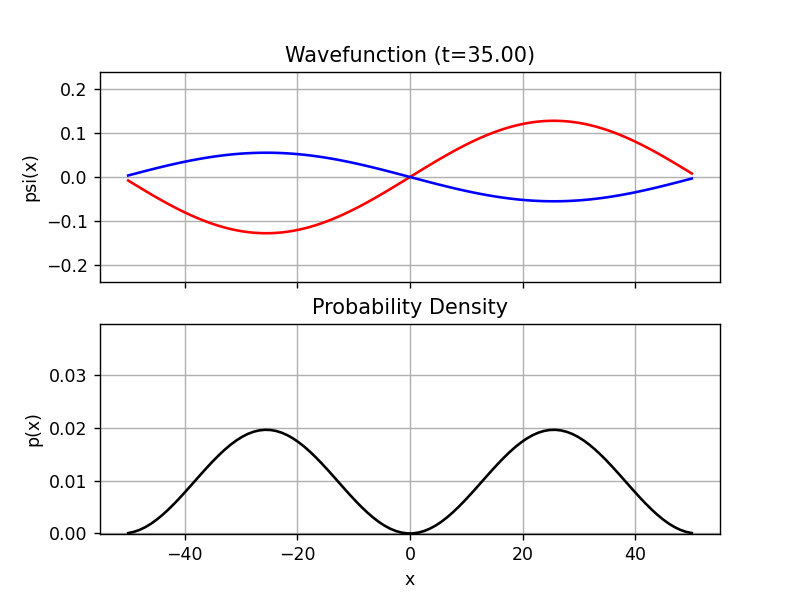

In [36]:
evolution = evolve(psi, E)

print('Real component in red, imaginary in blue')

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title('Wavefunction')
ax1.set_ylabel('psi(x)')
ax2.set_title('Probability Density')
ax2.set_ylabel('p(x)')
ax2.set_xlabel('x')
wave = psi
wave_real, = ax1.plot(X, wave.real, c='r')
wave_imag, = ax1.plot(X, wave.imag, c='b')
p = np.abs(wave)**2
dens, = ax2.plot(X, p, color='k')
ax1.grid()
ax2.grid()
lim = np.sqrt(p).max()+0.1
ax1.set_ylim(-lim, lim)
ax2.set_ylim(-1e-4, max(p)+0.02)

def run(data): # this updates the plot at every timestep given the wavefunction at the new time
    t, wave = data
    
    ax1.set_title('Wavefunction (t={:.2f})'.format(t))
    wave_real.set_data(X, wave.real)
    wave_imag.set_data(X, wave.imag)

    p = np.abs(wave)**2
    dens.set_data(X, p)
    
    return wave_real, wave_imag, dens

ani = animation.FuncAnimation(fig, run, evolution, blit=False, interval=10, repeat=False)

plt.show()

In [37]:
def evolve(psi1, E1, psi2, E2, timestep=5, num_step=500):
    ts = np.arange(num_step)*timestep
    t = 0
    cnt = 0
    while num_step is None or cnt < num_step:
        phase1 = np.exp(- 1j * E1 / eta * t)
        phase2 = np.exp(- 1j * E2 / eta * t)
        cnt += 1
        t += timestep
        yield t, phase1 * psi1, t, phase2 * psi2

Real component in red, imaginary in blue


<IPython.core.display.Javascript object>


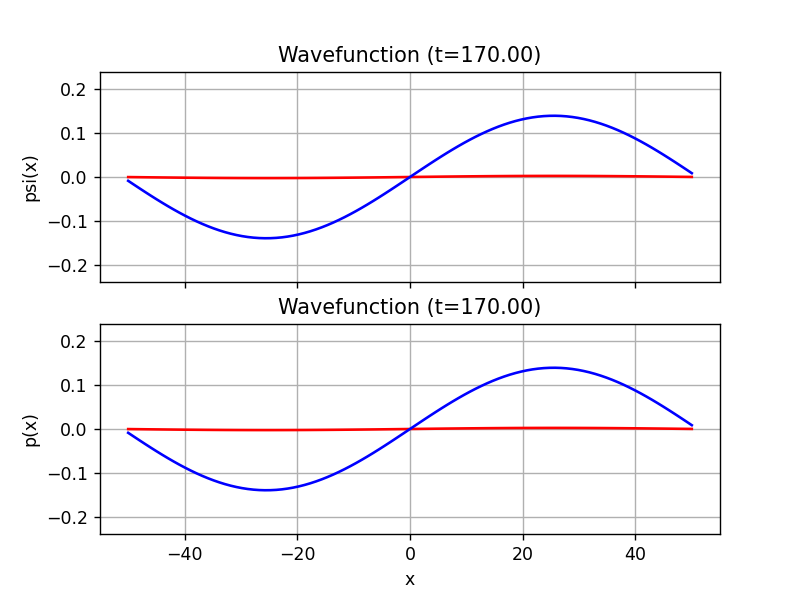

In [38]:
evolution = evolve(vecs[1].astype(np.complex64), vals[1], vecs[1].astype(np.complex64), vals[1])

print('Real component in red, imaginary in blue')

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title('Wavefunction')
ax1.set_ylabel('psi(x)')
ax2.set_title('Probability Density')
ax2.set_ylabel('p(x)')
ax2.set_xlabel('x')
wave1 = vecs[1].astype(np.complex64)
wave1_real, = ax1.plot(X, wave1.real, c='r')
wave1_imag, = ax1.plot(X, wave1.imag, c='b')
wave2 = vecs[2].astype(np.complex64)
wave2_real, = ax2.plot(X, wave2.real, c='r')
wave2_imag, = ax2.plot(X, wave2.imag, c='b')
ax1.grid()
ax2.grid()
lim = np.sqrt(p).max()+0.1
ax1.set_ylim(-lim, lim)
ax2.set_ylim(-lim, lim)

def run(data): # this updates the plot at every timestep given the wavefunction at the new time
    t1, wave1, t2, wave2 = data
    
    ax1.set_title('Wavefunction (t={:.2f})'.format(t1))
    wave1_real.set_data(X, wave1.real)
    wave1_imag.set_data(X, wave1.imag)
    
    ax2.set_title('Wavefunction (t={:.2f})'.format(t2))
    wave2_real.set_data(X, wave2.real)
    wave2_imag.set_data(X, wave2.imag)
    
    return wave1_real, wave1_imag, wave2_real, wave2_imag

ani = animation.FuncAnimation(fig, run, evolution, blit=False, interval=10, repeat=False)

plt.show()

Note how eventhough the wavefunction is changing over time, the resulting probability density over positions doesn't change. We call the eigenstates of the hamiltonian stationary because the time dependence only changes the overall phase of the state, which does not affect any observable property of our particle.

In [55]:
cutoff = 20 # how many energy levels to trust from our computed results (probably shouldn't be more than 20 or so)
psi = vecs[:cutoff].astype(np.complex64)
E = vals[:cutoff]
coeff = np.zeros(cutoff, dtype=np.complex64)

# Here you can set the coefficients of the state to anything you want (don't worry about normalization yet)

coeff[0] = 1
coeff[1] = 1
coeff[2] = 0

In [56]:
try:
    norm = (np.abs(coeff)**2).sum()
    assert norm > 0
    coeff /= np.sqrt(norm)
except AssertionError:
    print('Error: Norm is zero, you must set the coeffients to nonzero')

In [57]:
def evolve(coeff, psi, E, timestep=5, num_step=300):
    assert len(coeff) == len(psi) == len(E)
    ts = np.arange(num_step)*timestep
    t = 0
    cnt = 0
    while num_step is None or cnt < num_step:
        c = coeff * np.exp(- 1j * E / eta * t)
        cnt += 1
        t += timestep
        yield t, c @ psi

Real component in red, imaginary in blue


<IPython.core.display.Javascript object>


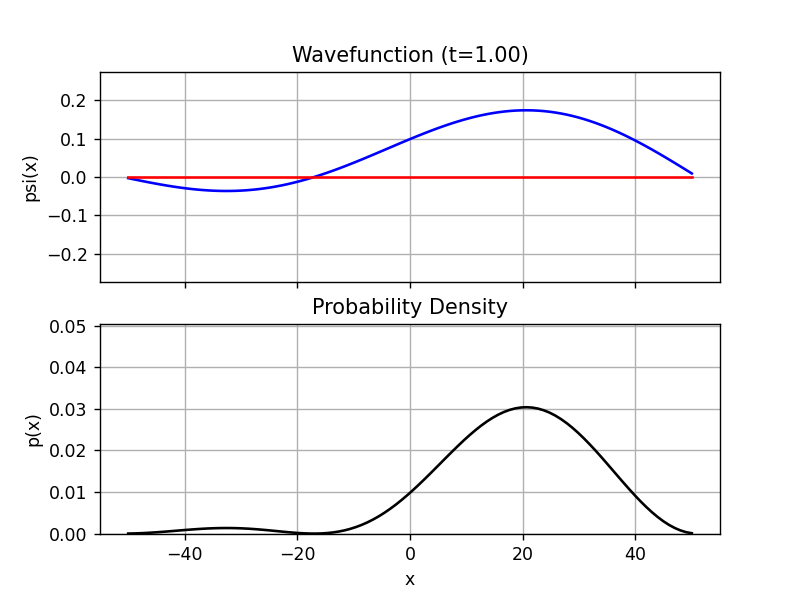

In [58]:
timestep = 1
num_step = 1

if timestep is None:
    av_E = (coeff)**2 @ E
    timestep = 2*np.pi * eta / av_E / num_step
    print('Using timestep: {:.4f}'.format(timestep))
    
evolution = evolve(coeff, psi, E, timestep=timestep, num_step=num_step)

print('Real component in red, imaginary in blue')

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title('Wavefunction')
ax1.set_ylabel('psi(x)')
ax2.set_title('Probability Density')
ax2.set_ylabel('p(x)')
ax2.set_xlabel('x')
wave = (coeff @ psi)
wave_real, = ax1.plot(X, wave.real, c='b')
wave_imag, = ax1.plot(X, wave.imag, c='r')
p = np.abs(wave)**2
dens, = ax2.plot(X, p, color='k')
#ax2.fill_between(X, p, color='k', alpha=0.2)
ax1.grid()
ax2.grid()
lim = np.sqrt(p).max()+0.1
ax1.set_ylim(-lim, lim)
ax2.set_ylim(-1e-4, max(p)+0.02)

def run(data):
    # update the data
    t, wave = data
    
    ax1.set_title('Wavefunction (t={:.2f})'.format(t))
    
    wave_real.set_data(X, wave.real)
    wave_imag.set_data(X, wave.imag)
    

    p = np.abs(wave)**2
    dens.set_data(X, p)
    
#     dens.set_data(X, ((wave @ np.diag(X) @ np.conj(wave.T)) + 3)/100)
    #fig.canvas.draw()
    
    return wave_real, wave_imag, dens

ani = animation.FuncAnimation(fig, run, evolution, blit=False, interval=10, repeat=False)

plt.show()

### Problem 5: Wavefunctions Oscillate

As the time evolution of our stationary states is given by $ e^{-i\frac{E}{\hbar}t} $, we know our wavefunction oscillates with time.

Given a particle in the box in the second excited state $\psi_2$ with $\eta = 1$, $m = 1$, $L = 100$, and $N = 100$ (using the notation in the code, $a \approx 1$). If the wavefunction of our particle is entirely real at $t = 0$, what is the smallest amount of time we have to wait before the wavefunction is once again entirely real?

Compare the result you get empirically (using the numerical approach above) to what you would expect in theory.

$ t = \frac{\pi \hbar}{E_2} $

In [43]:
np.pi * eta / E

array([6626.55027245, 1657.03833751,  736.75846448,  414.66064475,
        265.57551733,  184.59116208,  135.76031535,  104.06738828,
         82.33899669,   66.79698445,   55.29783458,   46.55197224,
         39.74582141,   34.34553786,   29.98905548,   26.42378661,
         23.46917354,   20.99337535,   18.89830545,   17.10976842])

In [44]:
level = 2
psi = vecs[level].astype(np.complex64)
E = vals[level]

In [45]:
t = 0
wave = psi
while t == 0 or all(abs(wave.imag) >= 0.000001): 
## for t in range(737):
    t += 0.1
    phase = np.exp(- 1j * E / eta * t)
    wave = wave * phase
print(t)

777.5000000001082


I tried to use while loop find the empirical value, but I cannot got the exact 736.75... But the 737 behaviors correctly in the animation below. 

In [46]:
def evolve(psi, E, timestep=1, num_step=737):
    ts = np.arange(num_step)*timestep
    t = 0
    cnt = 0
    while num_step is None or cnt < num_step:
        phase = np.exp(- 1j * E / eta * t)
        cnt += 1
        t += timestep
        yield t, phase * psi

In [47]:
level = 2
psi = vecs[level].astype(np.complex64)
E = vals[level]

Real component in red, imaginary in blue


<IPython.core.display.Javascript object>


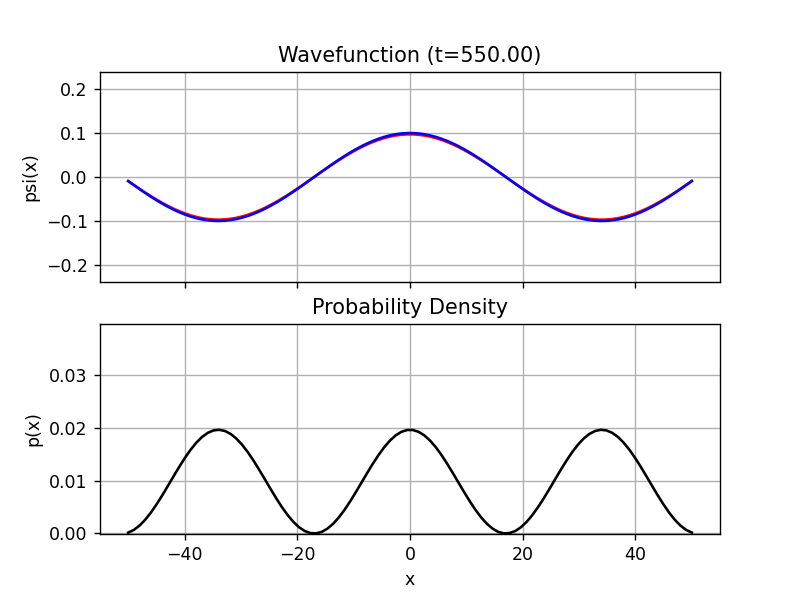

In [48]:
evolution = evolve(psi, E)

print('Real component in red, imaginary in blue')

fig, (ax1, ax2) = plt.subplots(2, sharex=True)
ax1.set_title('Wavefunction')
ax1.set_ylabel('psi(x)')
ax2.set_title('Probability Density')
ax2.set_ylabel('p(x)')
ax2.set_xlabel('x')
wave = psi
wave_real, = ax1.plot(X, wave.real, c='r')
wave_imag, = ax1.plot(X, wave.imag, c='b')
p = np.abs(wave)**2
dens, = ax2.plot(X, p, color='k')
ax1.grid()
ax2.grid()
lim = np.sqrt(p).max()+0.1
ax1.set_ylim(-lim, lim)
ax2.set_ylim(-1e-4, max(p)+0.02)

def run(data): # this updates the plot at every timestep given the wavefunction at the new time
    t, wave = data
    
    ax1.set_title('Wavefunction (t={:.2f})'.format(t))
    wave_real.set_data(X, wave.real)
    wave_imag.set_data(X, wave.imag)

    p = np.abs(wave)**2
    dens.set_data(X, p)
    
    return wave_real, wave_imag, dens

ani = animation.FuncAnimation(fig, run, evolution, blit=False, interval=10, repeat=False)

plt.show()